## Economic statistics - HW №3

The pair of households we chose are:
<br>
Household B: Sofianski
<br>
Living in an own apartment in Sofia, Bulgaria (with mortgage)
Husband: born in 1993; a degree in Engineering from the Technical University in Sofia University; sales manager in a big international retail company (his job is in Sofia)
Wife: born in 1991; a degree in Pedagogy from Sofia University; teacher in a public school in Sofia
Children: three born in 2018, 2019 and 2021
100% of the household total income is from salaries
No other bank loans (just the mortgage)
<br>
Household D: Silva
<br>
Living in an own apartment in Lisbon, Portugal (no mortgage)
Husband: born in 1993; a degree in Engineering from University of Coimbra; machine learning engineer in IT consulting company (his job is in Lisbon)
Wife: born in 1993; a degree in Pedagogy from University of Lisbon; teacher in a public school in Lisbon
Children: three born in 2018, 2019 and 2021
About 80% of the household total income is from salaries (the remaining 20% are received from their real estate properties in Lisbon province)
No bank loans


Q1
<br>
[1]	Using proper graphs and figures, present the dynamics of the following indicator: share of expenditures spent on food in the EU-27 as well as in the countries which the households you chose live in over the whole period included in the [Eurostat data sets](https://ec.europa.eu/eurostat/databrowser/view/hbs_str_t211/default/table?lang=en).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import eurostat
import numpy as np

In [32]:
# making a variable, that will filter the eurostat data 
filter_pars_HW = {'geo': ['EU27_2007', "EU27_2020", 'BG', 'PT'], 'coicop': ['CP01', 'CP09']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data = eurostat.get_data_df('hbs_str_t211', filter_pars=filter_pars_HW)

# Combining rows of data for EU27
EU27_food = eurostat_data.iloc[[0, 2]].sum()
EU27_leisure = eurostat_data.iloc[[1, 3]].sum()

# Dropping the unneeded initial ones
eurostat_data = eurostat_data.drop([0, 1, 2, 3])

# Making the new rows into data frames that have columns based on the original data
EU27_total_food = pd.DataFrame([EU27_food], columns=eurostat_data.columns)
EU27_total_leisure = pd.DataFrame([EU27_leisure], columns=eurostat_data.columns)

# Concatinating the new rows with the original data
updated_data = pd.concat([EU27_total_food, EU27_total_leisure, eurostat_data], ignore_index=True)

# Renaming some columns and cells for better readability
updated_data['geo\\TIME_PERIOD'] = updated_data['geo\\TIME_PERIOD'].replace({'EU27_2007EU27_2020' : 'EU27'})
updated_data['coicop'] = updated_data['coicop'].replace({'CP01CP01':'CP01', 'CP09CP09':'CP09'})
updated_data = updated_data.rename(columns={'geo\TIME_PERIOD' : 'country'})

# Replacing the zeros from the concatination with special numpy NaN, for better data manipulation
updated_data.replace(0, np.nan, inplace=True)

# Removing the columns freq and unit as we do not need them
updated_data = updated_data.drop(columns=['freq', 'unit'])

# Updated dataframe
print(updated_data)

  coicop country   1988   1994   1999   2005   2010   2015   2020
0   CP01    EU27    NaN    NaN    NaN  168.0  161.0  162.0  171.0
1   CP09    EU27    NaN    NaN    NaN   84.0   85.0   73.0   67.0
2   CP01      BG    NaN    NaN  482.0  315.0  293.0  266.0  246.0
3   CP09      BG    NaN    NaN   33.0   29.0   26.0   42.0   46.0
4   CP01      PT  296.0  212.0  187.0  155.0  133.0  143.0    NaN
5   CP09      PT   40.0   37.0   48.0   57.0   53.0   42.0    NaN


In [34]:
# Converting the dataframe to long format
Expenditure = updated_data.melt(id_vars=[('coicop'), ('country')], var_name='year', value_name='Expenditure')

# Making a copy 
df_copy = Expenditure.copy()

# Removing the NaN value cells
Expenditure = Expenditure.dropna()

# converting a "per mille" value to a percentage
Expenditure['Expenditure'] *= 0.1

# Dividing the dataframe on the expenditure
food_expenditure = Expenditure[Expenditure['coicop'] == 'CP01']
leisure_expenditure = Expenditure[Expenditure['coicop'] == 'CP09']

# Showing the dataframes
print(food_expenditure.head())
print(leisure_expenditure.head())

   coicop country  year  Expenditure
4    CP01      PT  1988         29.6
10   CP01      PT  1994         21.2
14   CP01      BG  1999         48.2
16   CP01      PT  1999         18.7
18   CP01    EU27  2005         16.8
   coicop country  year  Expenditure
5    CP09      PT  1988          4.0
11   CP09      PT  1994          3.7
15   CP09      BG  1999          3.3
17   CP09      PT  1999          4.8
19   CP09    EU27  2005          8.4


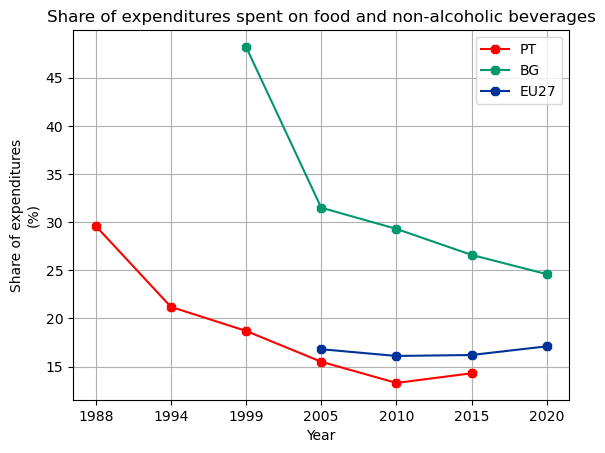

In [35]:
# Plotting for food expenditure for each different country
for country in food_expenditure['country'].unique():
    country_data = food_expenditure[food_expenditure['country'] == country]
    if country == 'BG':
        line_color = '#00966E'
    elif country == 'PT':
        line_color = 'red'
    else:
        line_color = '#003399'
    plt.plot(country_data['year'], country_data['Expenditure'], label=country, marker = '8', color=line_color)
plt.title('Share of expenditures spent on food and non-alcoholic beverages')
plt.xlabel('Year')
plt.ylabel('Share of expenditures\n(%)')
plt.legend()
plt.grid(True)

Q2
<br>
Using proper graphs and figures, present the dynamics of the following indicator: share of expenditures spent on leisure activities in the EU-27 as well as in the countries which the households you chose live in over the whole period included in the Eurostat data sets. 

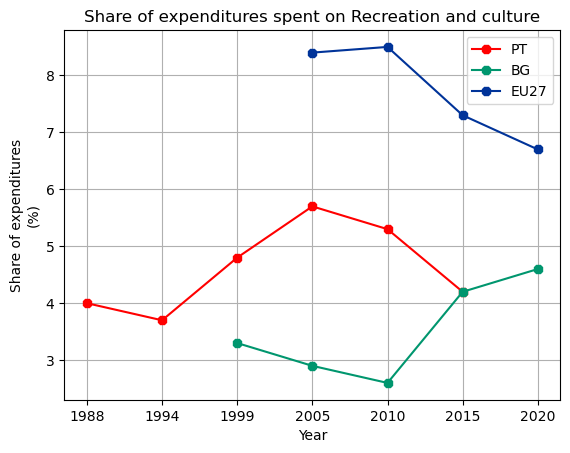

In [36]:
# Plotting for leisure expenditure for each different country
for country in leisure_expenditure['country'].unique():
    country_data = leisure_expenditure[leisure_expenditure['country'] == country]
    if country == 'BG':
        line_color = '#00966E'
    elif country == 'PT':
        line_color = 'red'
    else:
        line_color = '#003399'
    plt.plot(country_data['year'], country_data['Expenditure'], label=country, marker = '8', color=line_color)
plt.title('Share of expenditures spent on Recreation and culture')
plt.xlabel('Year')
plt.ylabel('Share of expenditures\n(%)')
plt.legend()
plt.grid(True)

Q3
<br>
[5]	How the COVID-19 lockdowns changed households’ spending? What households stopped consuming, what they started consuming (more)? Did the lockdowns change the households’ budget structure in the countries which the households you chose live in? Do you expect considerable changes in this structure due to the ongoing economic crisis in Europe (energy crisis triggered by war conflicts, price pressures, increasing interest rates, etc.) [Dataset](https://ec.europa.eu/eurostat/databrowser/view/nama_10_co3_p3__custom_9413698/default/table?lang=en)

In [3]:
filter_pars_HW_Q5 = {'geo': ['BG', 'PT'], 'coicop': ['CP01', 'CP02', 'CP03', 'CP03', 'CP04', 'CP05', 'CP06', 'CP07', 'CP08', 'CP09', 'CP10', 'CP11', 'CP12'],
                    'time': ['2019', '2020', '2021', '2022'], 'unit':['PC_TOT']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data_Q5 = eurostat.get_data_df('nama_10_co3_p3', filter_pars=filter_pars_HW_Q5)

# Renaming some columns and cells for better readability
eurostat_data_Q5 = eurostat_data_Q5.rename(columns={'geo\TIME_PERIOD' : 'country'})

# Removing the columns freq and unit as we do not need them
eurostat_data_Q5 = eurostat_data_Q5.drop(columns=['freq', 'unit'])

print(eurostat_data_Q5.head())

  coicop country  1975  1976  1977  1978  1979  1980  1981  1982  ...  2013  \
0   CP01      BG  None  None  None  None  None  None  None  None  ...  18.6   
1   CP01      BG  None  None  None  None  None  None  None  None  ...  18.6   
2   CP01      BG  None  None  None  None  None  None  None  None  ...  18.6   
3   CP01      BG  None  None  None  None  None  None  None  None  ...  18.6   
4   CP02      BG  None  None  None  None  None  None  None  None  ...   6.7   

   2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  19.2  19.4  19.6  19.3  19.1  18.5  20.7  19.8  20.8  
1  19.2  19.4  19.6  19.3  19.1  18.5  20.7  19.8  20.8  
2  19.2  19.4  19.6  19.3  19.1  18.5  20.7  19.8  20.8  
3  19.2  19.4  19.6  19.3  19.1  18.5  20.7  19.8  20.8  
4   5.4   5.2   5.3   5.2   5.2   5.3   5.7   5.2   4.8  

[5 rows x 50 columns]


In [26]:
# Converting the dataframe to long format
Q5_data_long = eurostat_data_Q5.melt(id_vars=[('coicop'), ('country')], var_name='year', value_name='Expenditure')

# Making a copy 
Q5_data_long = Q5_data_long.copy()

# Removing the NaN value cells
Q5_data_long = Q5_data_long.dropna()

# Making the year column to Date format
Q5_data_long['year'] = pd.to_datetime(Q5_data_long['year'], format = '%Y')
Q5_data_long['year'] = Q5_data_long['year'].dt.strftime('%Y')

# Filtering to include only dates > 2018
Q5_data_long = Q5_data_long[(Q5_data_long['year'] > "2018")]

# Dividing the dataframe for the two countries
BG_expenditure = Q5_data_long[Q5_data_long['country'] == 'BG']
PT_expenditure = Q5_data_long[Q5_data_long['country'] == 'PT']

print(BG_expenditure)

     coicop country  year Expenditure
4576   CP01      BG  2019        18.5
4577   CP01      BG  2019        18.5
4578   CP01      BG  2019        18.5
4579   CP01      BG  2019        18.5
4580   CP02      BG  2019         5.3
...     ...     ...   ...         ...
4935   CP11      BG  2022         6.8
4936   CP12      BG  2022         6.3
4937   CP12      BG  2022         6.3
4938   CP12      BG  2022         6.3
4939   CP12      BG  2022         6.3

[208 rows x 4 columns]


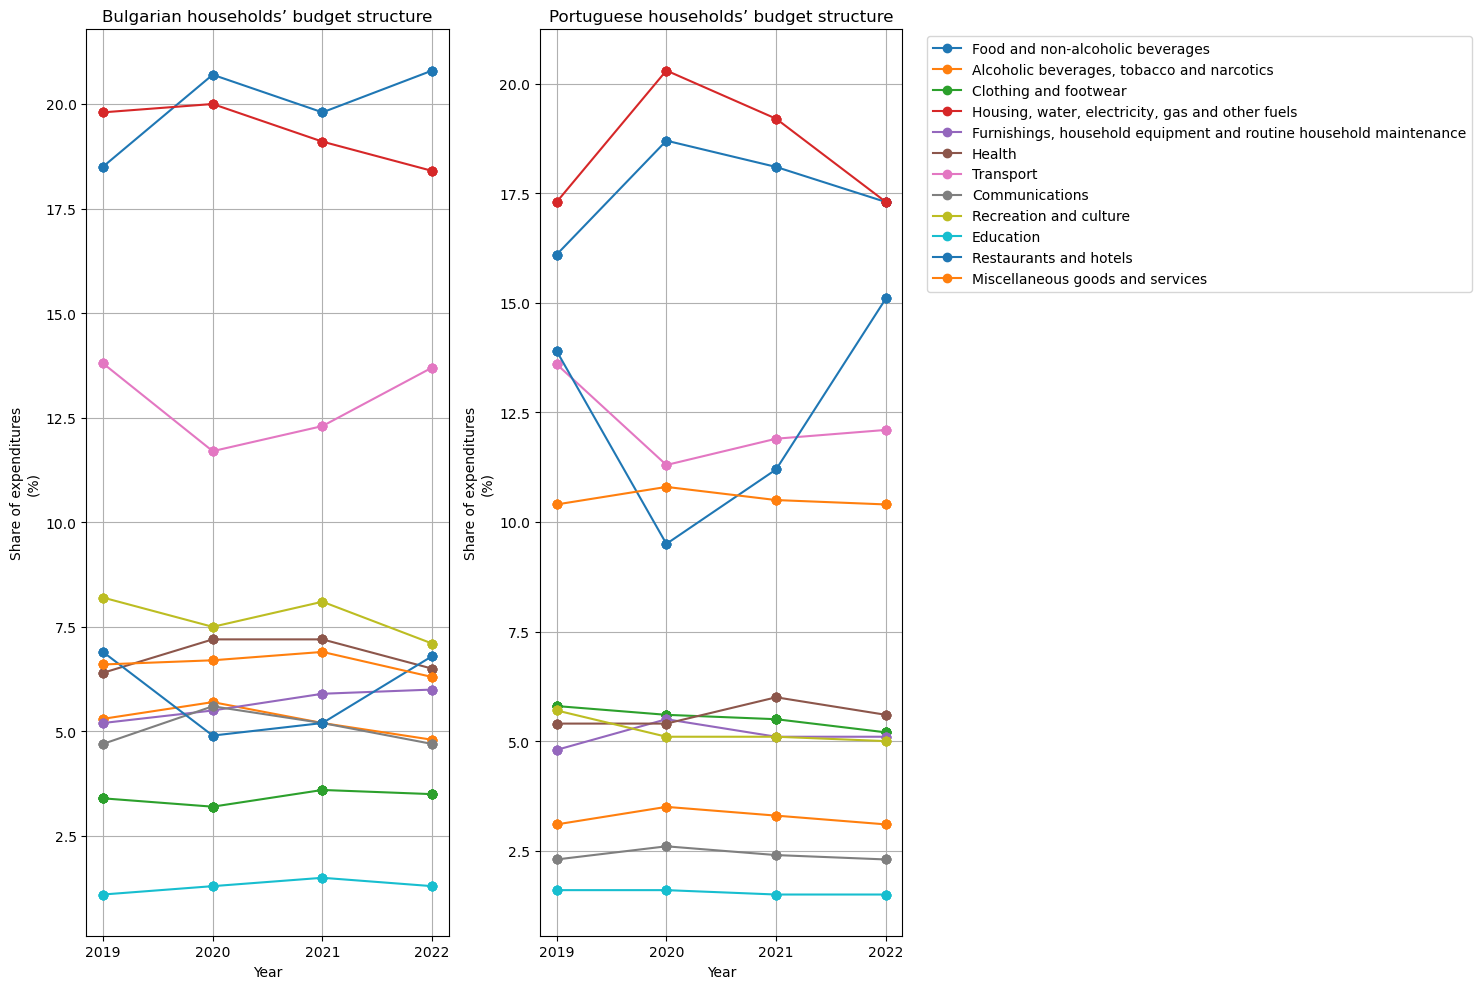

In [55]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Bulgarian Budget
for cp in BG_expenditure['coicop'].unique():
    cp_data = BG_expenditure[BG_expenditure['coicop'] == cp]
    if cp == 'CP01':
        expense = 'Food and non-alcoholic beverages'
    elif cp == 'CP02':
        expense = 'Alcoholic beverages, tobacco and narcotics'
    elif cp == 'CP03':
        expense = 'Clothing and footwear'
    elif cp == 'CP04':
        expense = 'Housing, water, electricity, gas and other fuels'
    elif cp == 'CP05':
        expense = 'Furnishings, household equipment and routine household maintenance'
    elif cp == 'CP06':
        expense = 'Health'
    elif cp == 'CP07':
        expense = 'Transport'
    elif cp == 'CP08':
        expense = 'Communications'
    elif cp == 'CP09':
        expense = 'Recreation and culture'
    elif cp == 'CP10':
        expense = 'Education'
    elif cp == 'CP11':
        expense = 'Restaurants and hotels'
        color = 'black'
    else:
        expense = 'Miscellaneous goods and services'
    axs[0].plot(cp_data['year'], cp_data['Expenditure'], label = expense, marker = 'o')
    
axs[0].set_title('Bulgarian households’ budget structure')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Share of expenditures\n(%)')
axs[0].grid(True)

# Portugal
for cp in PT_expenditure['coicop'].unique():
    cp_data = PT_expenditure[PT_expenditure['coicop'] == cp]
    if cp == 'CP01':
        expense = 'Food and non-alcoholic beverages'
    elif cp == 'CP02':
        expense = 'Alcoholic beverages, tobacco and narcotics'
    elif cp == 'CP03':
        expense = 'Clothing and footwear'
    elif cp == 'CP04':
        expense = 'Housing, water, electricity, gas and other fuels'
    elif cp == 'CP05':
        expense = 'Furnishings, household equipment and routine household maintenance'
    elif cp == 'CP06':
        expense = 'Health'
    elif cp == 'CP07':
        expense = 'Transport'
    elif cp == 'CP08':
        expense = 'Communications'
    elif cp == 'CP09':
        expense = 'Recreation and culture'
    elif cp == 'CP10':
        expense = 'Education'
    elif cp == 'CP11':
        expense = 'Restaurants and hotels'
    else:
        expense = 'Miscellaneous goods and services'
    axs[1].plot(cp_data['year'], cp_data['Expenditure'], label = expense, marker = 'o')
    
axs[1].set_title('Portuguese households’ budget structure')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Share of expenditures\n(%)')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

[9]	Do the households you chose have a better life than the households from the poorest European regions?
<br>
Data from here: https://ec.europa.eu/eurostat/databrowser/view/tgs00005/default/table?lang=en&category=reg.reg_eco10.reg_eco10gdp

In [7]:
# making a variable, that will filter the eurostat data 
filter_pars_HW = {'geo': ['BG42', "BG41", 'FRY5', 'PT17']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data_Q9 = eurostat.get_data_df('tgs00005', filter_pars=filter_pars_HW)

# Renaming some columns and cells for better readability
eurostat_data_Q9['geo\\TIME_PERIOD'] = eurostat_data_Q9['geo\\TIME_PERIOD'].replace({'BG42' : 'Yuzhen tsentralen', 
                                                                                    'BG41' : 'Yugozapaden',
                                                                                    'FRY5' : 'Mayotte',
                                                                                    'PT17' : 'Área Metropolitana de Lisboa'})
eurostat_data_Q9 = eurostat_data_Q9.rename(columns={'geo\TIME_PERIOD' : 'Region'})

# Removing the columns freq and unit as we do not need them
eurostat_data_Q9 = eurostat_data_Q9.drop(columns=['freq', 'unit'])

# Updated dataframe
print(eurostat_data_Q9)

                         Region     2010     2011     2012     2013     2014  \
0             Yuzhen tsentralen   7800.0   8200.0   8600.0   8500.0   8600.0   
1                   Yugozapaden  19000.0  19500.0  19600.0  19400.0  20300.0   
2                       Mayotte   6300.0   6400.0   6400.0   6900.0   7200.0   
3  Área Metropolitana de Lisboa  29200.0  28100.0  27000.0  27700.0  27800.0   

      2015     2016     2017     2018     2019     2020     2021  
0   9300.0   9700.0  10300.0  11000.0  11600.0  12000.0  12300.0  
1  21500.0  22500.0  23800.0  25200.0  27900.0  27800.0  31100.0  
2   7800.0   8000.0   8400.0   8300.0   8700.0   8700.0   9100.0  
3  28400.0  28900.0  29700.0  30800.0  32000.0  29400.0  31100.0  


In [8]:
# Converting the dataframe to long format
eurostat_data_Q9 = eurostat_data_Q9.melt(id_vars=['Region'], var_name='year', value_name='GDP per capita')

print(eurostat_data_Q9.head())

                         Region  year  GDP per capita
0             Yuzhen tsentralen  2010          7800.0
1                   Yugozapaden  2010         19000.0
2                       Mayotte  2010          6300.0
3  Área Metropolitana de Lisboa  2010         29200.0
4             Yuzhen tsentralen  2011          8200.0


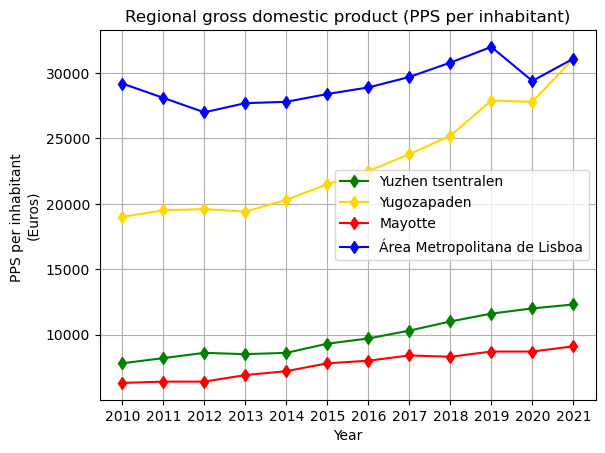

In [35]:
# Plotting for regional gdp per capita for each different region
for region in eurostat_data_Q9['Region'].unique():
    region_data = eurostat_data_Q9[eurostat_data_Q9['Region'] == region]
    if region == 'Yuzhen tsentralen':
        line_color = 'green'
    elif region == 'Yugozapaden':
        line_color = 'gold'
    elif region == 'Mayotte':
        line_color = 'red'
    elif region == 'Área Metropolitana de Lisboa':
        line_color = 'blue'
    plt.plot(region_data['year'], region_data['GDP per capita'], label=region, marker = 'd', color = line_color)
    
plt.title('Regional gross domestic product (PPS per inhabitant)')
plt.xlabel('Year')
plt.ylabel('PPS per inhabitant \n(Euros)')
plt.legend()
plt.grid(True)

In [37]:
# making a variable, that will filter the eurostat data 
filter_pars_HW = {'geo': ['BG42', "BG41", 'PT17']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data_Q9_2 = eurostat.get_data_df('ilc_mdsd18', filter_pars=filter_pars_HW)

# Renaming some columns and cells for better readability
eurostat_data_Q9_2['geo\\TIME_PERIOD'] = eurostat_data_Q9_2['geo\\TIME_PERIOD'].replace({'BG42' : 'Yuzhen tsentralen', 
                                                                                    'BG41' : 'Yugozapaden',
                                                                                    'FRY5' : 'Mayotte',
                                                                                    'PT17' : 'Área Metropolitana de Lisboa'})
eurostat_data_Q9_2 = eurostat_data_Q9_2.rename(columns={'geo\TIME_PERIOD' : 'Region'})

# Removing the columns freq and unit as we do not need them
eurostat_data_Q9_2 = eurostat_data_Q9_2.drop(columns=['freq', 'unit'])

# Updated dataframe
print(eurostat_data_Q9_2)

                         Region  2015  2016  2017  2018  2019  2020  2021  \
0             Yuzhen tsentralen  43.4  37.8  35.1  26.8  25.2  26.9  23.8   
1                   Yugozapaden  28.3  23.3  19.8  14.9  14.1  12.7  11.5   
2  Área Metropolitana de Lisboa   NaN   NaN   NaN   5.9   5.1   4.1   5.3   

   2022  
0  26.9  
1  11.1  
2   5.1  


In [38]:
# Converting the dataframe to long format
eurostat_data_Q9_2 = eurostat_data_Q9_2.melt(id_vars=['Region'], var_name='year', value_name='deprivation')

print(eurostat_data_Q9_2.head())

                         Region  year  deprivation
0             Yuzhen tsentralen  2015         43.4
1                   Yugozapaden  2015         28.3
2  Área Metropolitana de Lisboa  2015          NaN
3             Yuzhen tsentralen  2016         37.8
4                   Yugozapaden  2016         23.3


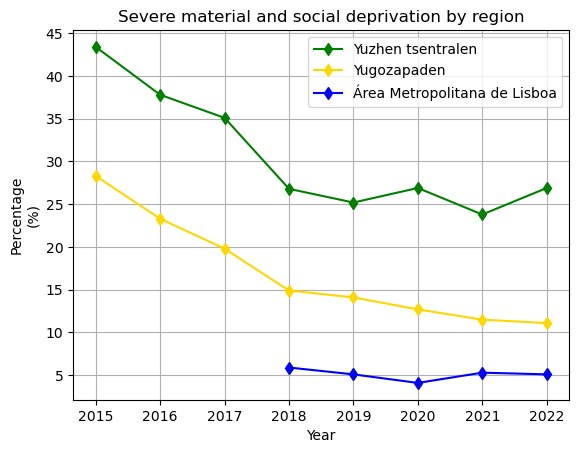

In [39]:
# Plotting for regional gdp per capita for each different region
for region in eurostat_data_Q9_2['Region'].unique():
    region_data = eurostat_data_Q9_2[eurostat_data_Q9_2['Region'] == region]
    if region == 'Yuzhen tsentralen':
        line_color = 'green'
    elif region == 'Yugozapaden':
        line_color = 'gold'
    elif region == 'Área Metropolitana de Lisboa':
        line_color = 'blue'
    plt.plot(region_data['year'], region_data['deprivation'], label=region, marker = 'd', color = line_color)
    
plt.title('Severe material and social deprivation by region')
plt.xlabel('Year')
plt.ylabel('Percentage\n(%)')
plt.legend()
plt.grid(True)

In [22]:
# making a variable, that will filter the eurostat data 
filter_pars_HW = {'geo': ['BG42', "BG41", 'PT17'], 'age':['Y15-29'], 'sex':['T']}

# from the eurostat library I import the COICOP consumption purpose dataset with my filters
eurostat_data_Q9_3 = eurostat.get_data_df('edat_lfse_22', filter_pars=filter_pars_HW)

# Renaming some columns and cells for better readability
eurostat_data_Q9_3['geo\\TIME_PERIOD'] = eurostat_data_Q9_3['geo\\TIME_PERIOD'].replace({'BG42' : 'Yuzhen tsentralen', 
                                                                                    'BG41' : 'Yugozapaden',
                                                                                    'PT17' : 'Área Metropolitana de Lisboa'})
eurostat_data_Q9_3 = eurostat_data_Q9_3.rename(columns={'geo\TIME_PERIOD' : 'Region'})

# Removing the columns freq and unit as we do not need them
eurostat_data_Q9_3 = eurostat_data_Q9_3.drop(columns=['freq', 'unit', 'training', 'sex', 'wstatus', 'age'])

# Updated dataframe
print(eurostat_data_Q9_3)

                         Region  2000  2001  2002  2003  2004  2005  2006  \
0             Yuzhen tsentralen   NaN   NaN   NaN  34.7  32.4  32.6  27.8   
1                   Yugozapaden   NaN  22.1  19.6  20.6  18.1  16.4  14.7   
2  Área Metropolitana de Lisboa  10.5  10.8  11.0  12.6  12.1  12.1  12.0   

   2007  2008  ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  22.6  20.0  ...  28.5  25.5  23.7  25.4  21.7  23.0  19.4  22.2  19.9  15.9  
1  11.3   8.7  ...  15.7  14.8  12.8  14.5  10.6   8.1   7.0   8.7   9.3   9.4  
2  13.1  11.3  ...  16.1  13.2  10.7  12.2   9.9   9.2   9.2   9.8   8.7   7.7  

[3 rows x 24 columns]


In [23]:
# Converting the dataframe to long format
eurostat_data_Q9_3 = eurostat_data_Q9_3.melt(id_vars=['Region'], var_name='year', value_name='Early leavers')

print(eurostat_data_Q9_3.head())

                         Region  year  Early leavers
0             Yuzhen tsentralen  2000            NaN
1                   Yugozapaden  2000            NaN
2  Área Metropolitana de Lisboa  2000           10.5
3             Yuzhen tsentralen  2001            NaN
4                   Yugozapaden  2001           22.1


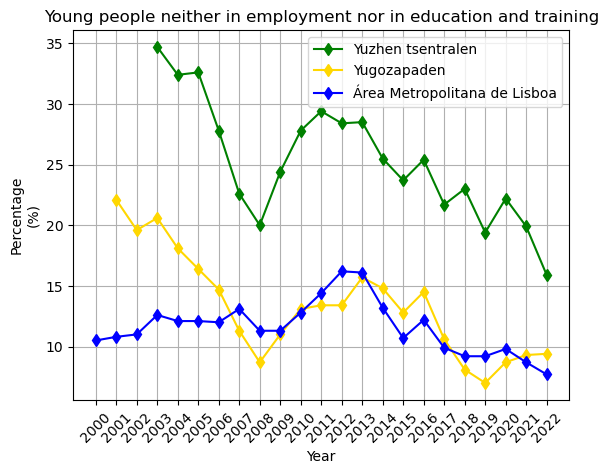

In [40]:
# Plotting for regional gdp per capita for each different region
for region in eurostat_data_Q9_3['Region'].unique():
    region_data = eurostat_data_Q9_3[eurostat_data_Q9_3['Region'] == region]
    if region == 'Yuzhen tsentralen':
        line_color = 'green'
    elif region == 'Yugozapaden':
        line_color = 'gold'
    elif region == 'Área Metropolitana de Lisboa':
        line_color = 'blue'
    plt.plot(region_data['year'], region_data['Early leavers'], label=region, marker = 'd', color = line_color)
    
plt.title('Young people neither in employment nor in education and training')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Percentage\n(%)')
plt.legend()
plt.grid(True)

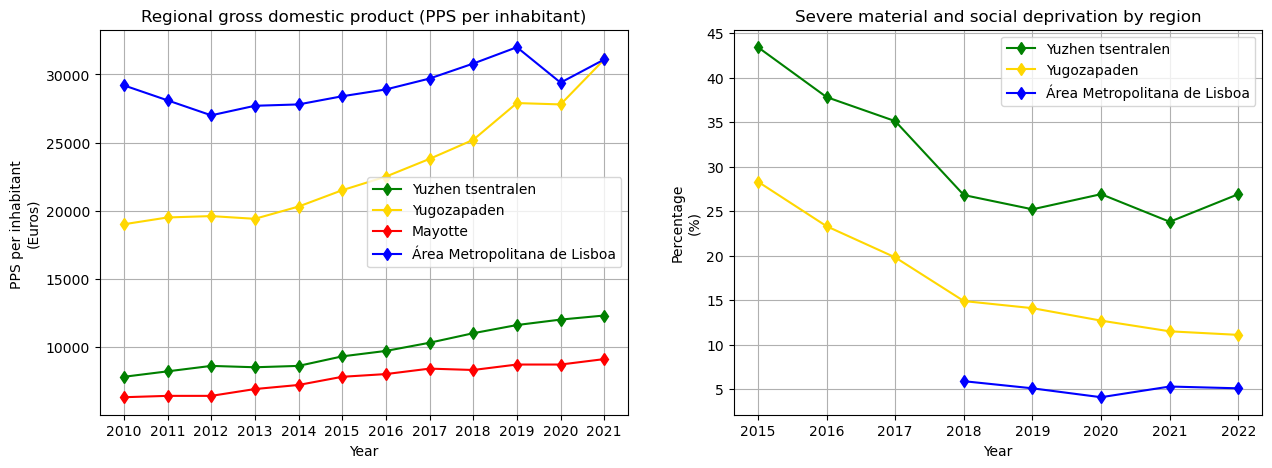

In [47]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting for regional gdp per capita for each different region
for region in eurostat_data_Q9['Region'].unique():
    region_data = eurostat_data_Q9[eurostat_data_Q9['Region'] == region]
    if region == 'Yuzhen tsentralen':
        line_color = 'green'
    elif region == 'Yugozapaden':
        line_color = 'gold'
    elif region == 'Mayotte':
        line_color = 'red'
    elif region == 'Área Metropolitana de Lisboa':
        line_color = 'blue'
    axs[0].plot(region_data['year'], region_data['GDP per capita'], label=region, marker = 'd', color = line_color)
    
axs[0].set_title('Regional gross domestic product (PPS per inhabitant)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('PPS per inhabitant \n(Euros)')
axs[0].legend()
axs[0].grid(True)

# Plotting for regional gdp per capita for each different region
for region in eurostat_data_Q9_2['Region'].unique():
    region_data = eurostat_data_Q9_2[eurostat_data_Q9_2['Region'] == region]
    if region == 'Yuzhen tsentralen':
        line_color = 'green'
    elif region == 'Yugozapaden':
        line_color = 'gold'
    elif region == 'Área Metropolitana de Lisboa':
        line_color = 'blue'
    axs[1].plot(region_data['year'], region_data['deprivation'], label=region, marker = 'd', color = line_color)
    
axs[1].set_title('Severe material and social deprivation by region')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Percentage\n(%)')
axs[1].legend()
axs[1].grid(True)